In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split

In [97]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [98]:
df.shape

(34857, 21)

In [99]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [100]:
df.drop(['Address', 'Date', 'Postcode', 'YearBuilt', 'Lattitude', 'Longtitude'], axis=1, inplace=True)

In [101]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,NaN,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0,Yarra City Council,Northern Metropolitan,4019.0


In [102]:
df.shape

(34857, 15)

In [103]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [104]:
df.nunique()

Suburb            351
Rooms              12
Type                3
Price            2871
Method              9
SellerG           388
Distance          215
Bedroom2           15
Bathroom           11
Car                15
Landsize         1684
BuildingArea      740
CouncilArea        33
Regionname          8
Propertycount     342
dtype: int64

In [105]:
df.Propertycount.value_counts()

21650.0    844
8870.0     722
10969.0    583
14949.0    552
10412.0    491
          ... 
129.0        1
335.0        1
604.0        1
83.0         1
794.0        1
Name: Propertycount, Length: 342, dtype: int64

In [106]:
df.Distance.value_counts()

11.2    1420
13.8     681
9.2      665
7.8      662
10.5     660
        ... 
30.6       1
32.6       1
22.9       1
33.0       1
31.4       1
Name: Distance, Length: 215, dtype: int64

In [107]:
df.Bedroom2.value_counts()

3.0     11881
4.0      6348
2.0      5777
5.0      1427
1.0       966
6.0       168
7.0        30
0.0        17
8.0        13
9.0         5
10.0        4
20.0        1
30.0        1
12.0        1
16.0        1
Name: Bedroom2, dtype: int64

In [108]:
df.Bathroom.value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

In [109]:
df.Car.value_counts()

2.0     12214
1.0      9164
0.0      1631
3.0      1606
4.0      1161
5.0       151
6.0       140
7.0        25
8.0        23
10.0        6
9.0         3
11.0        2
26.0        1
18.0        1
12.0        1
Name: Car, dtype: int64

In [110]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())

In [111]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,126.0,160.2564,Yarra City Council,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,202.0,160.2564,Yarra City Council,Northern Metropolitan,4019.0
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.0000,Yarra City Council,Northern Metropolitan,4019.0
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,0.0,160.2564,Yarra City Council,Northern Metropolitan,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.0000,Yarra City Council,Northern Metropolitan,4019.0


In [112]:
df.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price            7610
Method              0
SellerG             0
Distance            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
CouncilArea         3
Regionname          3
Propertycount       0
dtype: int64

In [113]:
df.dropna(inplace=True)

In [114]:
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

In [115]:
df.nunique()

Suburb            344
Rooms              12
Type                3
Price            2871
Method              5
SellerG           349
Distance          213
Bedroom2           14
Bathroom           10
Car                13
Landsize         1558
BuildingArea      663
CouncilArea        33
Regionname          8
Propertycount     336
dtype: int64

In [116]:
df.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
CouncilArea       object
Regionname        object
Propertycount    float64
dtype: object

In [120]:
cont_features = ['Distance', 'Landsize', 'BuildingArea', 'Propertycount']

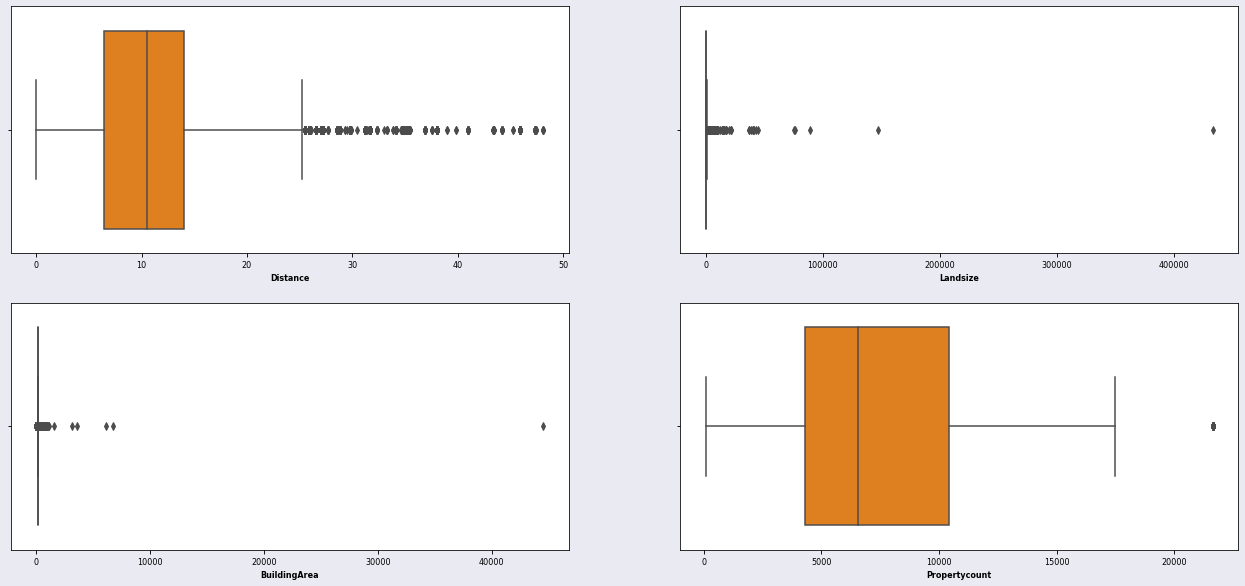

In [122]:
ncols = 2
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.boxplot(x=df[col], ax=axes[r, c], palette='autumn')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=8, width=0.9)
        axes[r, c].xaxis.offsetText.set_fontsize(10)
        axes[r, c].yaxis.offsetText.set_fontsize(10)
plt.show()

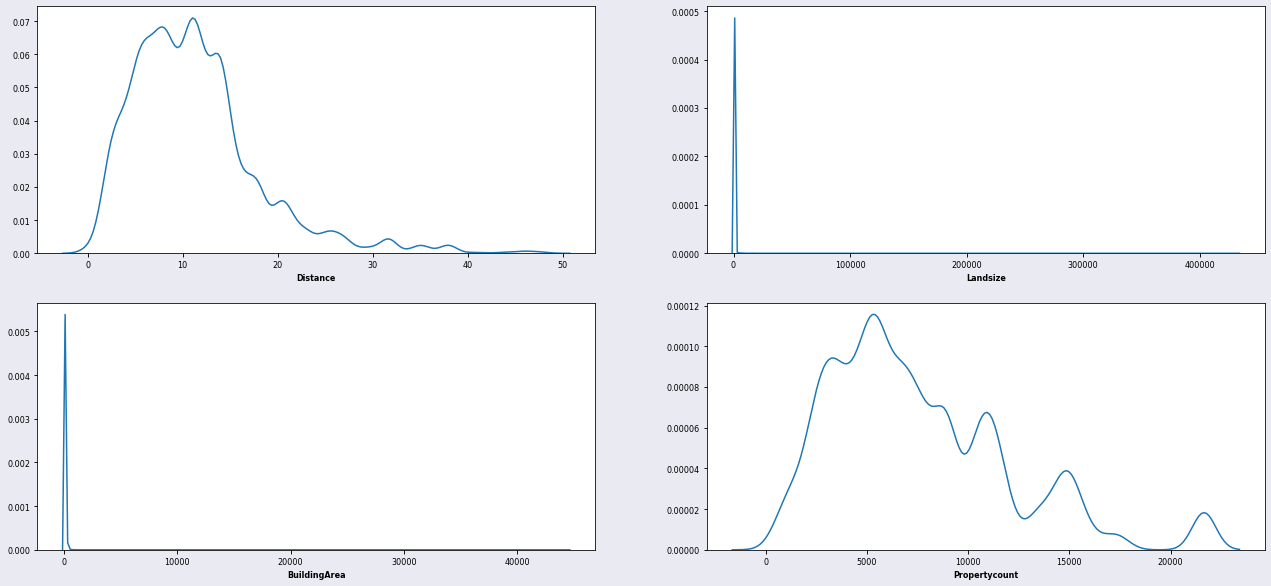

In [123]:
ncols = 2
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.kdeplot(x=df[col], ax=axes[r, c], palette='autumn')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8, fontweight='bold')
        axes[r, c].tick_params(labelsize=8, width=0.9)
        axes[r, c].xaxis.offsetText.set_fontsize(10)
        axes[r, c].yaxis.offsetText.set_fontsize(10)
plt.show()

In [93]:
df2 = pd.get_dummies(df, drop_first=True)

In [94]:
df2.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,1480000.0,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,850000.0,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,0,...,0,1,0,0,1,0,0,0,0,0


In [124]:
X = df2.drop('Price', axis=1)
y = df2['Price']

In [125]:
X.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Aberfeldie,Suburb_Airport West,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,2,2.5,2.0,1.0,1.0,202.0,160.2564,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,2.5,2.0,1.0,0.0,156.0,79.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3,2.5,3.0,2.0,0.0,134.0,150.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
5,3,2.5,3.0,2.0,1.0,94.0,160.2564,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,4,2.5,3.0,1.0,2.0,120.0,142.0000,4019.0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [137]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2)

In [148]:
def train(model, model_name):
    model.fit(X_train, y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Training data: {model_train_score * 100}%\n{model_name} model score on Testing data: {model_test_score * 100}%")

In [149]:
lr_algo = LinearRegression()
train(lr_algo, "Linear Regression")

Linear Regression model score on Training data: 68.27792395792723%
Linear Regression model score on Testing data: 13.853683161654374%


In [154]:
lasso_algo = Lasso(alpha=50, max_iter=1000, tol=0.1)
train(lasso_algo, "Lasso Regression")

Lasso Regression model score on Training data: 67.67137952292718%
Lasso Regression model score on Testing data: 66.36263038154189%


In [163]:
ridge_algo = Ridge(alpha=10, max_iter=1000, tol=0.1)
train(ridge_algo, "Ridge Regression")

Ridge Regression model score on Training data: 67.45543770461705%
Ridge Regression model score on Testing data: 67.43558187338981%
